In [98]:
data = [
    134.28, 372.67, 363.05, 100.06, 36.49, 77.69, 141.52, 246.29, 222.26, 298.42,
    342.59, 49.12, 271.52, 253.87, 283.42, 354.25, 495.76, 627.82, 404.69, 187.24,
    260.78, 112.35, 100.08, 376.52, 202.55, 252.79, 38.99, 176.30, 105.43, 302.46,
    157.33, 221.83, 544.60, 239.75, 91.41, 124.63, 237.71, 72.29, 191.30, 51.94,
    274.79, 75.47, 97.02, 201.64, 330.71, 251.82, 300.34, 211.72, 231.28, 204.83,
    165.76, 313.14, 104.96, 144.29, 247.21, 107.83, 291.05, 48.75, 155.63, 87.66,
    463.80, 28.17, 70.30, 185.42, 67.46, 205.93, 96.54, 117.69, 122.59, 179.35,
    88.83, 287.00, 344.46, 68.60, 285.02, 205.67, 124.63, 59.27, 149.68, 191.91,
    111.08, 65.77, 76.45, 22.81, 73.13, 127.57, 129.51, 64.97, 260.61, 163.41,
    116.68, 325.51, 43.78, 108.23, 515.87, 128.03, 180.01, 449.34, 348.24, 492.18,
    417.78, 88.70, 192.75, 181.11, 219.28, 37.08, 115.93, 239.96, 527.82, 363.32,
    468.73, 86.78, 82.61, 81.94, 112.76, 183.75, 83.37, 53.02, 338.31, 202.89,
    204.71, 146.15, 541.98, 222.88, 159.84, 100.93, 147.58, 89.49, 41.14, 306.66,
    283.80, 280.44, 195.69, 180.90, 328.65, 52.73, 58.04, 55.35, 280.22, 234.14,
    89.12, 364.95, 140.55, 445.10, 160.30, 369.56, 130.33, 222.82, 296.59, 131.76,
    124.94, 140.85, 194.16, 41.32, 217.09, 77.31, 187.62, 334.00, 416.61, 288.11,
    313.30, 367.80, 53.88, 275.87, 66.29, 297.81, 82.68, 287.84, 254.55, 271.99,
    218.10, 124.02, 192.64, 191.28, 210.37, 265.47, 180.94, 186.35, 157.31, 97.94,
    67.71, 121.44, 171.04, 238.09, 233.25, 273.64, 110.57, 56.82, 128.34, 227.70,
    233.54, 391.53, 151.24, 84.79, 122.78, 77.15, 257.54, 412.71, 238.45, 122.75,
    310.10, 48.05, 349.27, 259.27, 189.90, 203.33, 506.39, 254.21, 141.71, 168.38,
    149.27, 312.79, 151.08, 269.50, 222.08, 58.58, 99.80, 279.93, 167.38, 122.70,
    153.19, 197.08, 158.58, 298.15, 259.88, 268.25, 200.18, 277.58, 310.43, 244.53,
    414.66, 216.98, 261.93, 291.19, 121.01, 434.06, 324.53, 285.43, 178.21, 219.26,
    331.41, 124.59, 296.14, 205.29, 276.87, 177.46, 155.47, 107.05, 66.10, 323.78,
    138.24, 197.13, 101.06, 56.32, 353.61, 656.51, 151.05, 100.00, 223.72, 214.13,
    171.63, 212.83, 218.30, 175.16, 479.61, 330.51, 301.29, 54.60, 187.80, 148.63,
    102.43, 81.84, 203.10, 388.10, 271.54, 85.44, 440.35, 224.26, 135.93, 196.24,
    61.58, 391.47, 86.83, 61.95, 428.23, 169.58, 177.56, 214.50, 119.87, 147.97,
    48.60, 394.24, 154.05, 127.44, 263.84, 375.53, 78.12, 21.57, 80.20, 18.778
]


In [99]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [100]:
def calc_stat(sample_count, array):
    np.random.seed(42)  # For reproducibility
    sample = np.random.choice(array, size=sample_count, replace=False)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    var = np.var(sample, ddof=1)
    cv = std / mean * 100 if mean != 0 else float('inf')
    return mean, std, var, cv

In [101]:
def cal_conf_levels(conf_levels, mean, std, n):
    # CORRECTED: Two-tailed critical values
    t_p_dict = {
        0.90: 1.645,    # For 90% CI (two-tailed)
        0.95: 1.960,    # For 95% CI (two-tailed)  
        0.99: 2.576     # For 99% CI (two-tailed)
    }
    
    conf_intervals = {}
    margins = {}
    
    for conf in conf_levels:
        t_crit = t_p_dict[conf]
        margin = t_crit * std / np.sqrt(n)
        conf_intervals[conf] = (mean - margin, mean + margin)
        margins[conf] = margin
    
    return conf_intervals, margins

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Your main code
arr = np.array(data)
n = len(arr)

def distr_characteristics(array):
    

    full_mean, full_std, full_var, full_cv = calc_stat(300, array)
    print("Full sample stats:", calc_stat(300, array))

    samps = [10, 20, 50, 100, 200, 300]
    conf_levels = [0.90, 0.95, 0.99]
    full_conf_levels, full_margins = cal_conf_levels(conf_levels, full_mean, full_std, 300)
    print("Full margins:", full_margins)

    for i in samps:
        mean, std, var, cv = calc_stat(i, array)
        conf_intervals, margins = cal_conf_levels(conf_levels, mean, std, i)
        
        print(f'values for {i} items')
        print(f'mean: {mean:.2f} %: {(mean/full_mean)*100:.2f}%')
        print(f'std: {std:.2f} %: {(std/full_std)*100:.2f}%')
        print(f'var: {var:.2f} %: {(var/full_var)*100:.2f}%')
        print(f'cv: {cv:.2f} %: {(cv/full_cv)*100:.2f}%')
        
        for conf, interval in conf_intervals.items():
            # More meaningful comparison: margin as percentage of full margin
            margin_pct = (margins[conf] / full_margins[conf]) * 100 if full_margins[conf] != 0 else 0
            
            print(f"{int(conf * 100)}%: {interval[0]:.2f} — {interval[1]:.2f} "
                f"half_interval: {margins[conf]:.2f} %: {margin_pct:.2f}%")
        
        print('*' * 50)
distr_characteristics(arr)

Full sample stats: (np.float64(205.87172666666666), np.float64(120.57178792338652), np.float64(14537.556043042097), np.float64(58.5664626588614))
Full margins: {0.9: np.float64(11.451199368242754), 0.95: np.float64(13.643982225991367), 0.99: np.float64(17.932090925588657)}
values for 10 items
mean: 250.85 %: 121.85%
std: 78.30 %: 64.94%
var: 6130.99 %: 42.17%
cv: 31.21 %: 53.30%
90%: 210.12 — 291.58 half_interval: 40.73 %: 355.70%
95%: 202.32 — 299.38 half_interval: 48.53 %: 355.70%
99%: 187.07 — 314.64 half_interval: 63.78 %: 355.70%
**************************************************
values for 20 items
mean: 234.26 %: 113.79%
std: 81.65 %: 67.72%
var: 6666.39 %: 45.86%
cv: 34.85 %: 59.51%
90%: 204.23 — 264.29 half_interval: 30.03 %: 262.27%
95%: 198.48 — 270.04 half_interval: 35.78 %: 262.27%
99%: 187.23 — 281.29 half_interval: 47.03 %: 262.27%
**************************************************
values for 50 items
mean: 217.85 %: 105.82%
std: 115.28 %: 95.61%
var: 13288.99 %: 91.41%


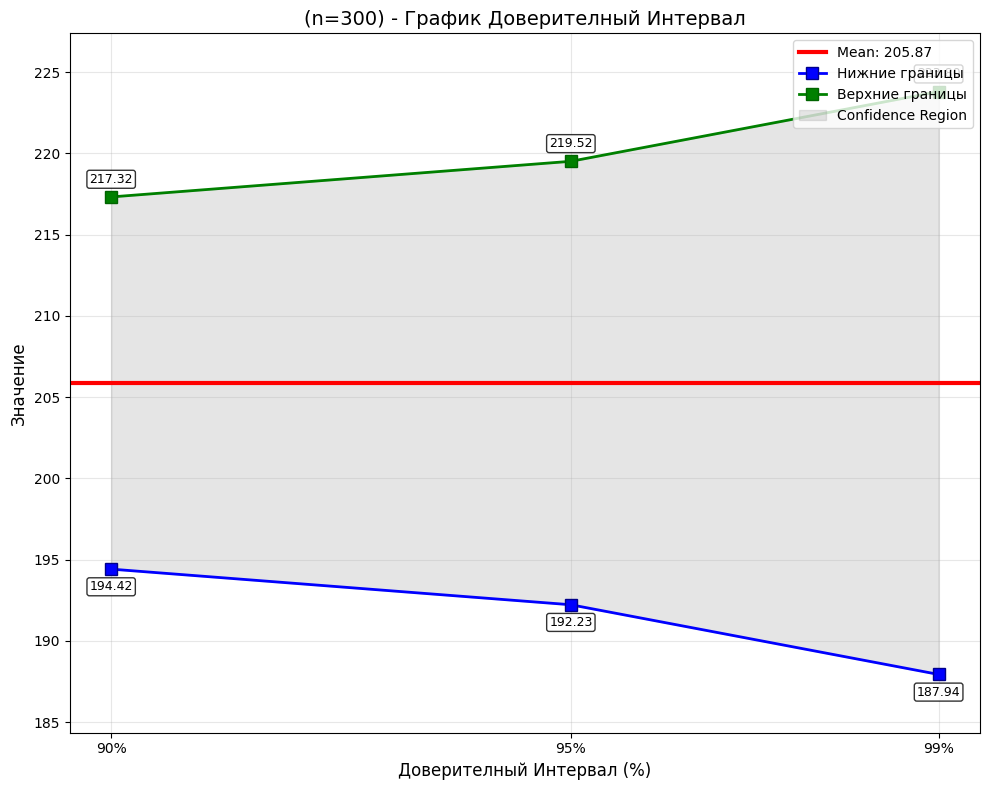

In [103]:
# Create the plot
plt.figure(figsize=(10, 8))

# Extract confidence interval data
confidence_values = []
lower_bounds = []
upper_bounds = []

for conf_level in conf_levels:
    lower, upper = full_conf_levels[conf_level]
    confidence_values.append(conf_level)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Convert to percentages for x-axis
x_values = [conf * 100 for conf in confidence_values]

# Plot the mean as a horizontal line
plt.axhline(y=full_mean, color='red', linestyle='-', linewidth=3, 
           label=f'Mean: {full_mean:.2f}')

# Plot lower boundary as a continuous line
plt.plot(x_values, lower_bounds, 's-', color='blue', linewidth=2, markersize=8, 
         markerfacecolor='blue', markeredgecolor='darkblue', markeredgewidth=1,
         label='Нижние границы')

# Plot upper boundary as a continuous line
plt.plot(x_values, upper_bounds, 's-', color='green', linewidth=2, markersize=8,
         markerfacecolor='green', markeredgecolor='darkgreen', markeredgewidth=1,
         label='Верхние границы')

# Fill the area between boundaries
plt.fill_between(x_values, lower_bounds, upper_bounds, alpha=0.2, color='gray',
                label='Confidence Region')

# Add value annotations
for i, (conf, lower, upper) in enumerate(zip(x_values, lower_bounds, upper_bounds)):
    plt.text(conf, lower - (upper_bounds[0] - lower_bounds[0]) * 0.03, f'{lower:.2f}', 
            ha='center', va='top', fontsize=9, 
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))
    plt.text(conf, upper + (upper_bounds[0] - lower_bounds[0]) * 0.03, f'{upper:.2f}', 
            ha='center', va='bottom', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

# Customize the plot
plt.xlabel('Доверителный Интервал (%)', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title(f'(n=300) - График Доверителный Интервал', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(x_values, [f'{int(conf)}%' for conf in x_values])

# Add some padding to y-axis to see the labels
y_range = max(upper_bounds) - min(lower_bounds)
plt.ylim(min(lower_bounds) - y_range * 0.1, max(upper_bounds) + y_range * 0.1)

plt.tight_layout()
plt.show()

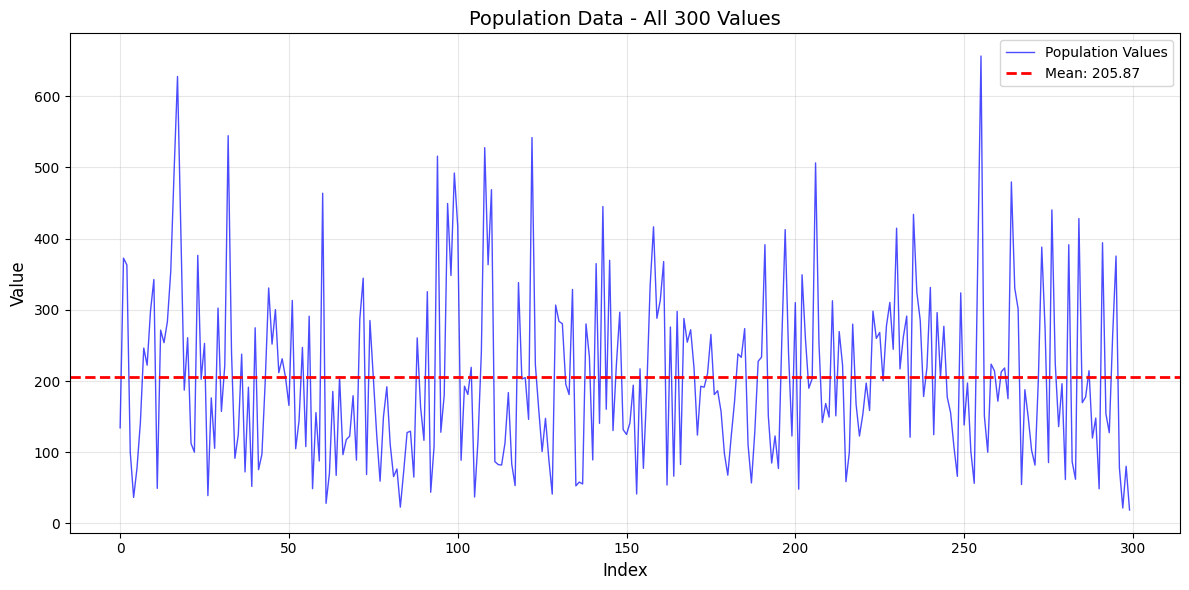

In [104]:
plt.figure(figsize=(12, 6))

# Simple line plot of all values
plt.plot(arr, 'b-', linewidth=1, alpha=0.7, label='Population Values')
plt.axhline(y=np.mean(arr), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {np.mean(arr):.2f}')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title(f'Population Data - All {len(arr)} Values', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

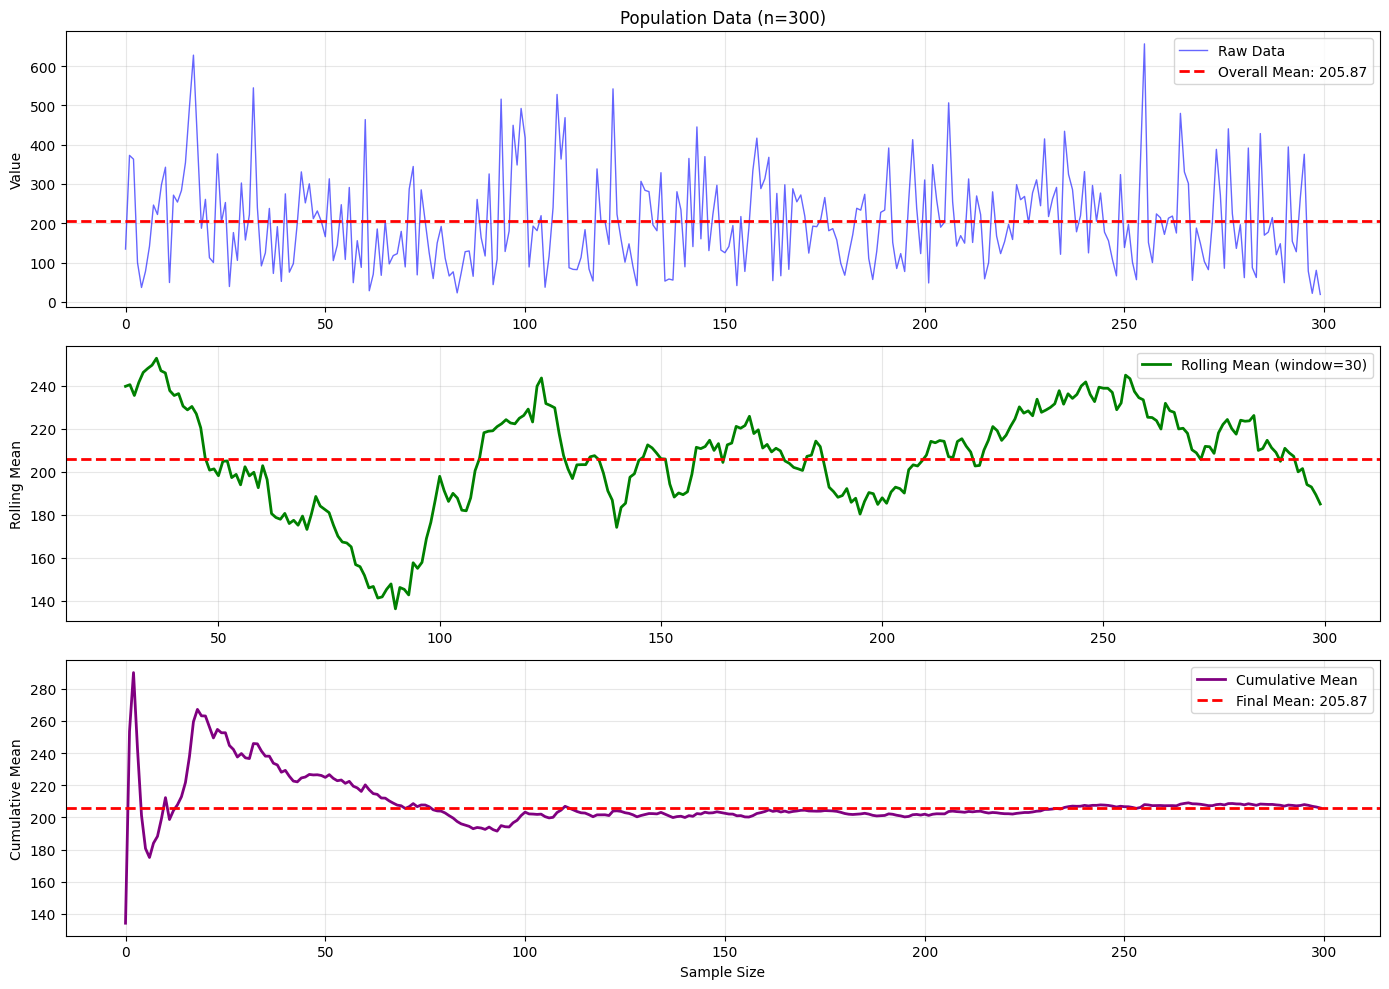

In [105]:
plt.figure(figsize=(14, 10))

# Plot 1: Raw data
plt.subplot(3, 1, 1)
plt.plot(arr, 'b-', linewidth=1, alpha=0.6, label='Raw Data')
plt.axhline(y=np.mean(arr), color='red', linestyle='--', linewidth=2, 
           label=f'Overall Mean: {np.mean(arr):.2f}')
plt.ylabel('Value')
plt.title(f'Population Data (n={len(arr)})')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Rolling mean (if data is large, use sampling)
window_size = min(50, len(arr)//10)  # Adaptive window size
if len(arr) > window_size:
    # Calculate rolling mean
    rolling_mean = np.convolve(arr, np.ones(window_size)/window_size, mode='valid')
    plt.subplot(3, 1, 2)
    plt.plot(range(window_size-1, len(arr)), rolling_mean, 'g-', linewidth=2, 
             label=f'Rolling Mean (window={window_size})')
    plt.axhline(y=np.mean(arr), color='red', linestyle='--', linewidth=2)
    plt.ylabel('Rolling Mean')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Plot 3: Cumulative mean
plt.subplot(3, 1, 3)
cumulative_mean = np.cumsum(arr) / np.arange(1, len(arr)+1)
plt.plot(cumulative_mean, 'purple', linewidth=2, label='Cumulative Mean')
plt.axhline(y=np.mean(arr), color='red', linestyle='--', linewidth=2,
           label=f'Final Mean: {np.mean(arr):.2f}')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Mean')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

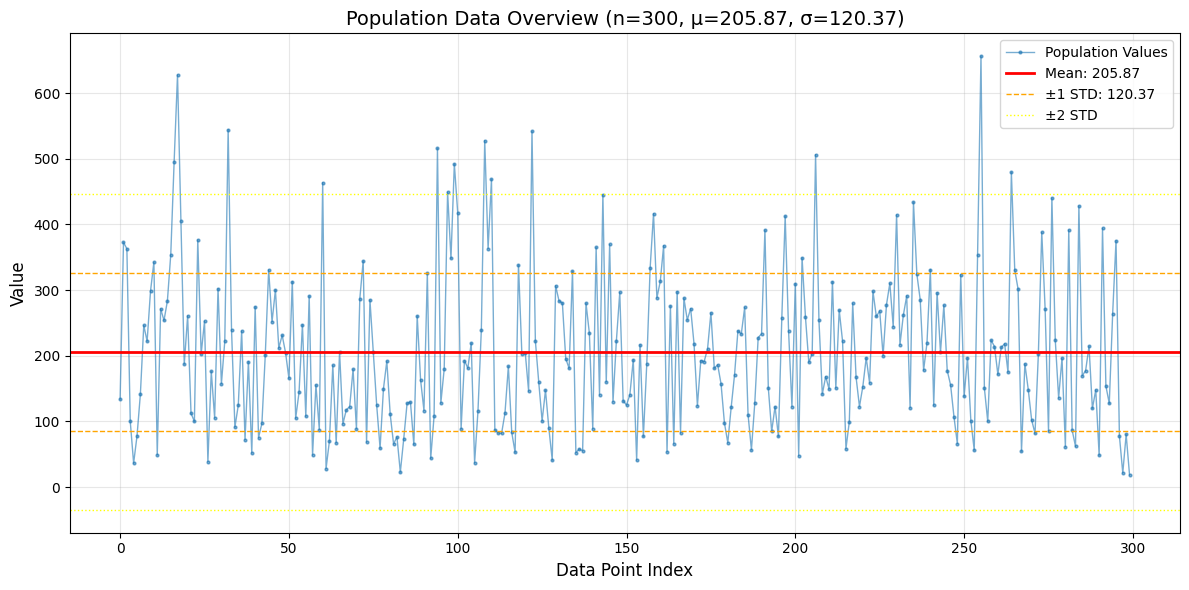

Population Statistics:
Size: 300
Mean: 205.8717
Std Dev: 120.3707
Min: 18.7780
Max: 656.5100
Range: 637.7320


In [106]:
def plot_simple_overview(arr):
    
    # Simple overview plot
    plt.figure(figsize=(12, 6))

    # Calculate basic statistics
    mean_val = np.mean(arr)
    std_val = np.std(arr)
    min_val = np.min(arr)
    max_val = np.max(arr)

    # Create the plot
    plt.plot(arr, 'o-', linewidth=1, markersize=2, alpha=0.6, label='Population Values')

    # Add statistical reference lines
    plt.axhline(y=mean_val, color='red', linestyle='-', linewidth=2, 
            label=f'Mean: {mean_val:.2f}')
    plt.axhline(y=mean_val + std_val, color='orange', linestyle='--', linewidth=1,
            label=f'±1 STD: {std_val:.2f}')
    plt.axhline(y=mean_val - std_val, color='orange', linestyle='--', linewidth=1)
    plt.axhline(y=mean_val + 2*std_val, color='yellow', linestyle=':', linewidth=1,
            label=f'±2 STD')
    plt.axhline(y=mean_val - 2*std_val, color='yellow', linestyle=':', linewidth=1)

    plt.xlabel('Data Point Index', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.title(f'Population Data Overview (n={len(arr)}, μ={mean_val:.2f}, σ={std_val:.2f})', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"Population Statistics:")
    print(f"Size: {len(arr)}")
    print(f"Mean: {mean_val:.4f}")
    print(f"Std Dev: {std_val:.4f}")
    print(f"Min: {min_val:.4f}")
    print(f"Max: {max_val:.4f}")
    print(f"Range: {max_val - min_val:.4f}")
plot_simple_overview(arr)

# Correlation Analysis

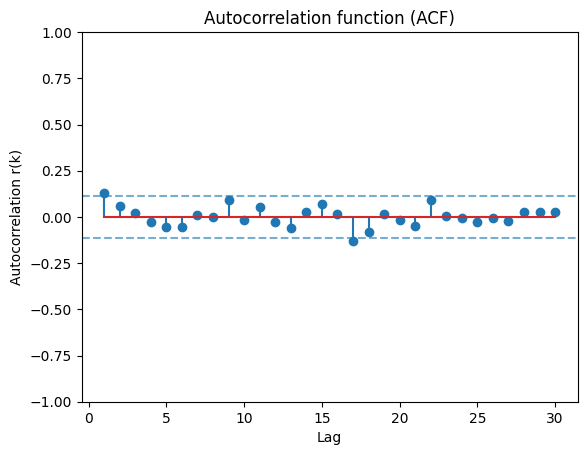

r(0..K): [ 1.      0.1275  0.0605  0.0227 -0.0295 -0.0525 -0.054   0.0109  0.0013
  0.09   -0.0161  0.0551 -0.0249 -0.0619  0.026   0.0711  0.0168 -0.1279
 -0.0793  0.0146 -0.0177 -0.047   0.0899  0.0066 -0.0048 -0.0259 -0.0072
 -0.0196  0.0283  0.0279  0.0257]
Approx. 95% significance band: ±0.113


In [107]:
import numpy as np
import matplotlib.pyplot as plt

def autocorr(x, max_lag):
    x = np.asarray(x, dtype=float)
    n = x.size
    mu = x.mean()
    dev = x - mu
    den = np.sum(dev**2)
    if den == 0:
        raise ValueError("Zero variance sequence (denominator is zero).")
    r = np.zeros(max_lag+1)
    for k in range(max_lag+1):
        num = np.sum(dev[:n-k] * dev[k: n])
        r[k] = num / den
    return r

# Example usage:
# Replace this 'data' with your flattened sequence from the table
#data = [593, 536, 360, 2860, 2115, 1975, 2397, 1231, 2307, 442, 3678, 2194, 2214, 1260, 46, 2433, 2701]

def plot_autocorr(data):


    max_lag = 30

    r = autocorr(data, max_lag)

    # Plot
    n = len(data)
    conf_level = 0.95
    conf_band = 1.96 / np.sqrt(n)   # approximate 95% significance band for white noise

    lags = np.arange(len(r))
    plt.stem(lags[1:], r[1:], )
    plt.axhline(conf_band, linestyle='--', alpha=0.6)
    plt.axhline(-conf_band, linestyle='--', alpha=0.6)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation r(k)')
    plt.title('Autocorrelation function (ACF)')
    plt.ylim(-1, 1)
    plt.show()

    print("r(0..K):", np.round(r, 4))
    print(f"Approx. 95% significance band: ±{conf_band:.3f}")

plot_autocorr(data)

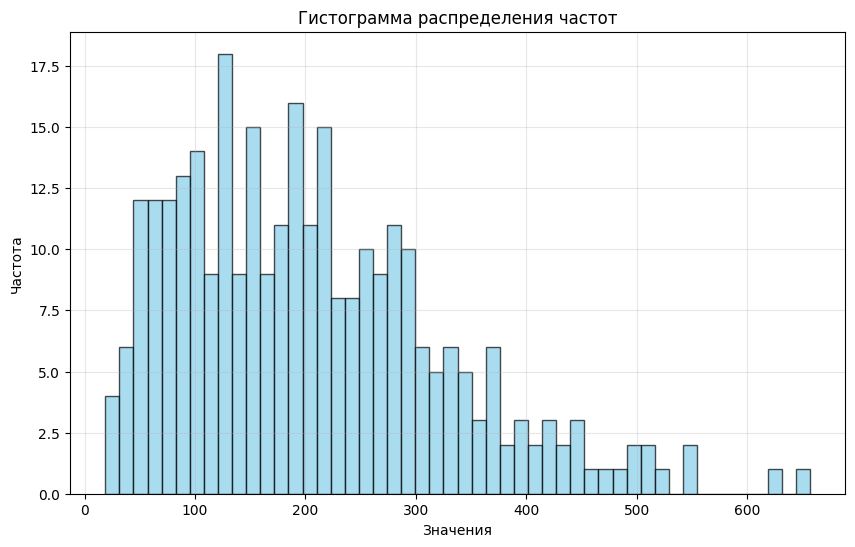

In [108]:
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения частот')
plt.grid(True, alpha=0.3)
plt.show()

In [109]:

def approximate_distribution(data, v_thresholds=[0.1, 0.9, 1.1]):
    """
    Аппроксимация распределения по двум начальным моментам
    с выводом промежуточных шагов
    """
    
    # Вычисление моментов
    m = np.mean(data)
    sigma = np.std(data)
    v = sigma / m if m != 0 else float('inf')
    
    print("=== Шаг 1. Вычисление моментов ===")
    print(f"Математическое ожидание μ: {m:.4f}")
    print(f"Среднеквадратическое отклонение σ: {sigma:.4f}")
    print(f"Коэффициент вариации CV = σ/μ: {v:.4f}")
    print()
    
    # Шаг 2. Выбор распределения по CV
    print("=== Шаг 2. Выбор распределения по CV ===")
    if v <= v_thresholds[0]:
        print(f"CV = {v:.4f} ≤ {v_thresholds[0]} → выбираем равномерное распределение")
        a = m - np.sqrt(3) * sigma
        b = m + np.sqrt(3) * sigma
        print(f"Вычисляем параметры: a = μ - √3·σ = {a:.4f}, b = μ + √3·σ = {b:.4f}")
        distribution_type = "Равномерное"
        params = {'a': a, 'b': b}
        
    elif v_thresholds[0] < v <= v_thresholds[1]:
        print(f"{v_thresholds[0]} < CV = {v:.4f} ≤ {v_thresholds[1]} → выбираем распределение Эрланга")
        k = max(1, round(1 / v**2))
        lam = k / m
        print(f"Вычисляем параметры: k = round(1/CV²) = {k}, λ = k/μ = {lam:.4f}")
        distribution_type = f"Эрланга {k}-го порядка"
        params = {'k': k, 'lambda': lam}
        
    elif v_thresholds[1] < v <= v_thresholds[2]:
        print(f"{v_thresholds[1]} < CV = {v:.4f} ≤ {v_thresholds[2]} → выбираем экспоненциальное распределение")
        lam = 1 / m
        print(f"Вычисляем параметр: λ = 1/μ = {lam:.4f}")
        distribution_type = "Экспоненциальное"
        params = {'lambda': lam}
        
    else:
        print(f"CV = {v:.4f} > {v_thresholds[2]} → выбираем гиперэкспоненциальное распределение (упрощённое)")
        p = 0.5
        lam1 = 2 * p / m
        lam2 = 2 * (1 - p) / m
        print(f"Используем p = {p}")
        print(f"λ₁ = 2p/μ = {lam1:.4f}, λ₂ = 2(1-p)/μ = {lam2:.4f}")
        distribution_type = "Гиперэкспоненциальное"
        params = {'p': p, 'lambda1': lam1, 'lambda2': lam2}
    
    print()
    print("=== Результат аппроксимации ===")
    print(f"Выбранное распределение: {distribution_type}")
    print(f"Параметры: {params}")
    
    return distribution_type, params, m, sigma, v


# пример запуска
distribution_type, params, m, sigma, v = approximate_distribution(data)


=== Шаг 1. Вычисление моментов ===
Математическое ожидание μ: 205.8717
Среднеквадратическое отклонение σ: 120.3707
Коэффициент вариации CV = σ/μ: 0.5847

=== Шаг 2. Выбор распределения по CV ===
0.1 < CV = 0.5847 ≤ 0.9 → выбираем распределение Эрланга
Вычисляем параметры: k = round(1/CV²) = 3, λ = k/μ = 0.0146

=== Результат аппроксимации ===
Выбранное распределение: Эрланга 3-го порядка
Параметры: {'k': 3, 'lambda': np.float64(0.01457218069024793)}


Sample mean: 12.36, Sample std: 7.29


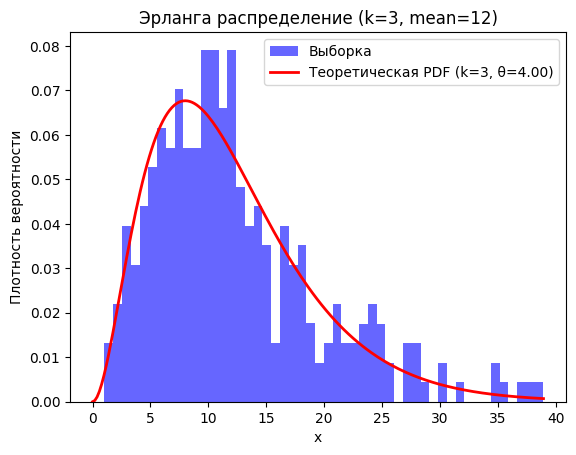

In [110]:
import math

def generate_erlanga(m, k=3, n=1000):
    theta = m / k   # масштабный параметр
    data = np.random.gamma(k, theta, n)  # гамма (эквивалент Эрланга для целого k)
    return data, theta

# параметры
m = 12  # среднее
k = 3
n = 300

# генерация выборки
samples, theta = generate_erlanga(m, k, n)

# статистики выборки
print(f"Sample mean: {np.mean(samples):.2f}, Sample std: {np.std(samples):.2f}")

# построение гистограммы
count, bins, _ = plt.hist(samples, bins=50, density=True, alpha=0.6, color="blue", label="Выборка")

# теоретическая плотность Эрланга
x = np.linspace(0, max(samples), 200)
pdf = (x**(k-1) * np.exp(-x/theta)) / (theta**k * math.factorial(k-1))

# наложение графика плотности
plt.plot(x, pdf, 'r-', linewidth=2, label=f"Теоретическая PDF (k={k}, θ={theta:.2f})")

plt.title(f"Эрланга распределение (k={k}, mean={m})")
plt.xlabel("x")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.show()


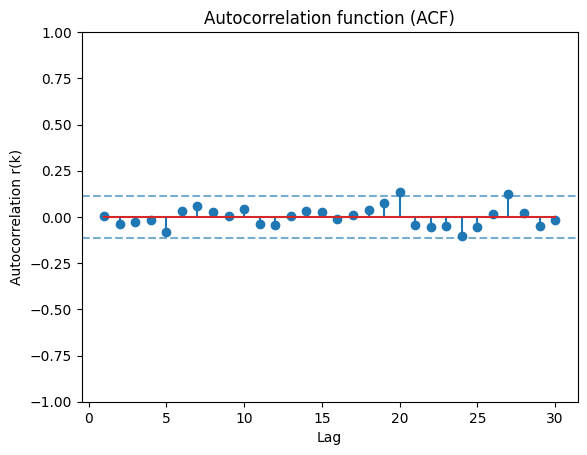

r(0..K): [ 1.      0.005  -0.036  -0.0276 -0.0172 -0.0798  0.0335  0.0613  0.0247
  0.0029  0.0443 -0.0405 -0.0441  0.0024  0.0296  0.0256 -0.0132  0.0123
  0.0382  0.0773  0.1346 -0.0411 -0.0564 -0.0471 -0.1012 -0.0534  0.0169
  0.1252  0.0237 -0.051  -0.0186]
Approx. 95% significance band: ±0.113


In [111]:
plot_autocorr(samples)

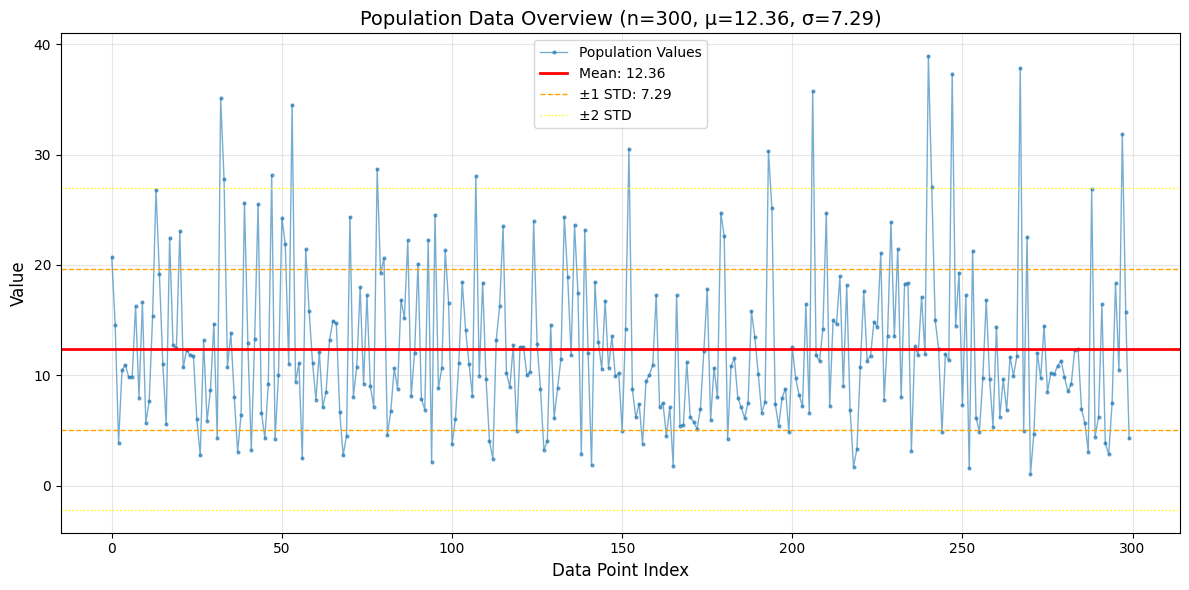

Population Statistics:
Size: 300
Mean: 12.3631
Std Dev: 7.2917
Min: 1.0192
Max: 38.9284
Range: 37.9093


In [112]:
plot_simple_overview(samples)

In [113]:
distr_characteristics(samples)

Full sample stats: (np.float64(12.36309531455219), np.float64(7.303903878102633), np.float64(53.34701186056269), np.float64(59.07827847533821))
Full margins: {0.9: np.float64(0.6936818381409428), 0.95: np.float64(0.8265145305509104), 0.99: np.float64(1.0862762401526251)}
values for 10 items
mean: 250.85 %: 2029.05%
std: 78.30 %: 1072.04%
var: 6130.99 %: 11492.66%
cv: 31.21 %: 52.83%
90%: 210.12 — 291.58 half_interval: 40.73 %: 5871.79%
95%: 202.32 — 299.38 half_interval: 48.53 %: 5871.79%
99%: 187.07 — 314.64 half_interval: 63.78 %: 5871.79%
**************************************************
values for 20 items
mean: 234.26 %: 1894.83%
std: 81.65 %: 1117.87%
var: 6666.39 %: 12496.28%
cv: 34.85 %: 59.00%
90%: 204.23 — 264.29 half_interval: 30.03 %: 4329.48%
95%: 198.48 — 270.04 half_interval: 35.78 %: 4329.48%
99%: 187.23 — 281.29 half_interval: 47.03 %: 4329.48%
**************************************************
values for 50 items
mean: 217.85 %: 1762.07%
std: 115.28 %: 1578.31%
var: 